### 6.4 Supervised Machine Learning : Regression

#### 1. Import Libraries and data

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
# Ensure charts are displayed in the notebook

%matplotlib inline

In [12]:
# define the path
path = r"C:\Users\sahin\Documents\Country_Vaccinations"

In [13]:
df = pd.read_csv(os.path.join(path, '02-Data', 'Prepared', 'country-vaccinations-cleaned.csv'))

#### 2. Data cleaning

In [14]:
df.columns

Index(['Unnamed: 0', 'country', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines'],
      dtype='object')

In [16]:
df.head(5)

,Unnamed: 0,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,0,Afghanistan,2/22/2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,1,Afghanistan,2/23/2021,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,2,Afghanistan,2/24/2021,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,3,Afghanistan,2/25/2021,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,4,Afghanistan,2/26/2021,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


In [17]:
df.shape

(81976, 13)

#### Missing values

In [23]:
# check for missing values

df.isnull().sum()

# No missing values to handle

Unnamed: 0                             0
country                                0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
dtype: int64

#### Duplicates check

In [22]:
dups = df.duplicated()

dups.sum()

# No duplicates

0

#### Extreme value checks

C:\Users\sahin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='people_vaccinated_per_hundred', ylabel='Density'>

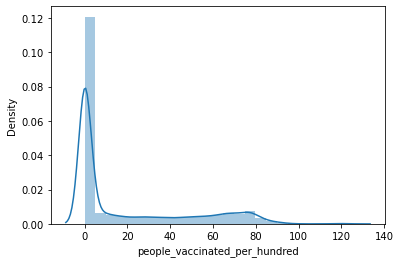

In [31]:
# Checking for extreme values in "total_vaccination_per_hundred"

sns.distplot(df['people_vaccinated_per_hundred'], bins=25)

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [34]:
df['people_vaccinated_per_hundred'].describe()

count    81976.000000
mean        19.218864
std         28.312537
min          0.000000
25%          0.000000
50%          0.000000
75%         37.090000
max        124.650000
Name: people_vaccinated_per_hundred, dtype: float64

In [35]:
df['people_vaccinated_per_hundred'].mean() # check the mean

19.218864057773086

In [36]:
df['people_vaccinated_per_hundred'].median()  # check the median

0.0

In [37]:
df['people_vaccinated_per_hundred'].max()  # check the max

124.65

C:\Users\sahin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='people_fully_vaccinated_per_hundred', ylabel='Density'>

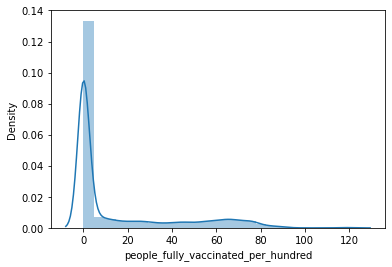

In [32]:
# Checking for extreme values in "people_fully_vaccinated_per_hundred"

sns.distplot(df['people_fully_vaccinated_per_hundred'], bins=25)

In [38]:
df['people_fully_vaccinated_per_hundred'].describe()

count    81976.000000
mean        15.487147
std         25.393017
min          0.000000
25%          0.000000
50%          0.000000
75%         24.000000
max        121.530000
Name: people_fully_vaccinated_per_hundred, dtype: float64

In [39]:
df['people_fully_vaccinated_per_hundred'].mean()  # check the mean

15.487146725871119

In [40]:
df['people_fully_vaccinated_per_hundred'].median()  # check the median

0.0

In [41]:
df['people_fully_vaccinated_per_hundred'].max()  # check the max

121.53

### 3. Data prep for regression analysis

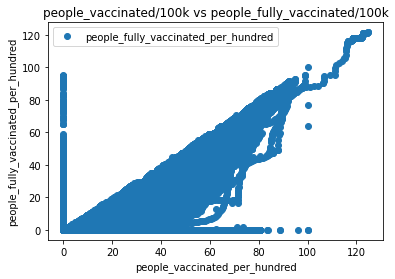

In [42]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
# 1.people_vaccinated_per_hundred vs people_fully_vaccinated_per_hundred

df.plot(x = 'people_vaccinated_per_hundred', y = 'people_fully_vaccinated_per_hundred', style='o')
plt.title('people_vaccinated/100k vs people_fully_vaccinated/100k')
plt.xlabel('people_vaccinated_per_hundred')
plt.ylabel('people_fully_vaccinated_per_hundred')
plt.show()

##### Hypothesis: The higher vaccinated people (people with 1st dose) increase the fully vaccinated people (people with second dose).

### Reshaping the variables

In [44]:
# Reshaping the variables into NumPy arrays and putting them into seperate objects

X = df['people_vaccinated_per_hundred'].values.reshape(-1,1)
y = df['people_fully_vaccinated_per_hundred'].values.reshape(-1,1)

In [45]:
X

array([[ 0.  ],
       [ 0.  ],
       [ 0.  ],
       ...,
       [29.  ],
       [29.01],
       [29.02]])

In [46]:
y

array([[ 0.  ],
       [ 0.  ],
       [ 0.  ],
       ...,
       [22.6 ],
       [22.6 ],
       [22.61]])

In [50]:
# Splitting the data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [51]:
# Creating a regression object

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [52]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)  # training the model

LinearRegression()

In [53]:
# Predict the values of y using X.
# Using the model on the test data set to predict some y values and see how accurate they are.

y_predicted = regression.predict(X_test)

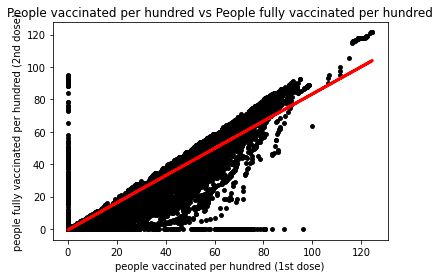

In [55]:
# Creating a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='black', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth = 3)
plot_test.title('People vaccinated per hundred vs People fully vaccinated per hundred')
plot_test.xlabel('people vaccinated per hundred (1st dose)')
plot_test.ylabel('people fully vaccinated per hundred (2nd dose)')
plot_test.show()


In [56]:
# Checking the accuracy of the model - mean squared error and R2.

rmse = mean_squared_error(y_test, y_predicted)  # this is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [57]:
# Printing the model's summary statistics

print('Slope', regression.coef_)
print('Mean squared error:', rmse)
print('R2 score:', r2)

Slope [[0.83932247]]
Mean squared error: 75.22618321271449
R2 score: 0.8829130864997832


##### The slope is a coefficient tells that as the people vaccinated per hundred ( X = people with 1st dose) rises, people fully vaccinated per hundred( y = people with 2nd dose) rises at a degree of 0.83932247. 

##### The mean squared error (MSE) is an estimator that measures the average of the squared difference between the estimated values and the true values. It states how close a regression line is to a set of points. A small MSE means that the regression line passes fairly close to the observations, making a good fit. I would interpret the result small to moderate MSE, so the linear regression line is good fit for this analysis.

##### The R2 score or R squared is a metric that shows how well the model explains the variance in the data. It's a number between 0 and 1, where values closer to 0 indicate a poor fit, and values closer to 1 indicate a good fit. I would interpret the results as the fit is good fit.

In [58]:
# Making a dataframe of y values and their predicted values to further see the performance of the model

y_predicted

array([[56.04939105],
       [-0.63844891],
       [-0.63844891],
       ...,
       [25.38894104],
       [63.03255404],
       [48.56263457]])

In [61]:
# Creating a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual' : y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,56.17,56.049391
1,0.00,-0.638449
2,0.00,-0.638449
3,0.00,-0.638449
4,32.04,27.898515
5,10.51,25.867355
6,0.04,1.652901
7,0.00,-0.638449
8,1.71,2.408292
9,0.00,-0.638449


##### This output shows there is some differences between the actual and predicted values.
##### This evidence that the model does not explain with a high level of accuracy the relationship between the "people vaccinated per hundred" and the "people fully vaccinated per hundred" variables.
#### The relationship doesn't follow a straight line, perhaps further analysis should be indicated to analyse outliers or other variables. **

In [62]:
# comparing how to the regression fits the training set

y_predicted_train = regression.predict(X_train)  # This is predicting X_train!

In [65]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)


In [66]:
print('Slope:', regression.coef_)
print('mean squared error:', rmse)
print('R2 score:', r2)

Slope: [[0.83932247]]
mean squared error: 80.56852566046798
R2 score: 0.8752397211268981


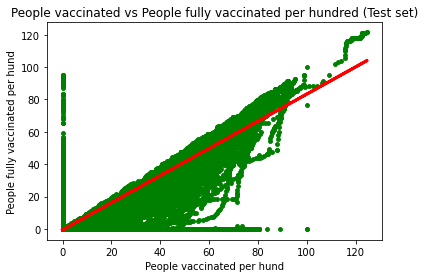

In [67]:
# Visualizing the training set results:

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s=15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth=3)
plot_test.title('People vaccinated vs People fully vaccinated per hundred (Test set)')  
plot_test.xlabel('People vaccinated per hund')
plot_test.ylabel('People fully vaccinated per hund')
plot_test.show()


I would say that model clearly explains the relationships between variables. Time is the another important factor at that point. For getting 2nd dose of vaccines, people needs to wait for a while. We may add the date variable within the restricted period. On the other hand, we may not know that 2nd dose vaccines are reached all the countries or not.